In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
#customized preprocessing pkg
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import datetime
import lib.stats.stats as st
import config.config as conf

### 소스코드 complexity 계산

In [3]:
input_year_list = ['2021', '2022', '2023']

In [4]:
input_pl = 'java'

In [5]:
# 파일 불러오기
complexity_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/complexity_{input_pl}_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        complexity_df = pd.concat([complexity_df, tmp], axis = 0)

In [6]:
print(complexity_df['cdate'].min())
print(complexity_df['cdate'].max())

2021-01-01
2023-12-03


In [7]:
complexity_df

,id,cdate,title,body
0,70542827,2021-12-31,Can't make Admob App Open Ads to appear on app...,<p>I'm trying to implement Admob App Open Ads ...
1,70542869,2021-12-31,I cannot connect to the websocket using Postman,<p>I am trying to create a simple chat applica...
2,70542979,2021-12-31,Android convert charset,<p>How can I convert this &quot;Predajnďż˝&quo...
3,70543231,2021-12-31,Spring cloud stream RabbitMQ - bind DLQ with a...,<p>I am using Spring Cloud Stream version <cod...
4,70543275,2021-12-31,Execution failed for task ':app:checkDebugDupl...,<h2>Task failed with an exception.</h2>\n<ul>\...
...,...,...,...,...
48287,77356120,2023-10-25,entityManagerFactory bean creation issue,<p>I am working migrating an application from ...
48288,77356158,2023-10-25,"JLabel Not Showing up when i run the program, ...",<p>I am using Java GUI builder in NetBeans(dra...
48289,77356182,2023-10-25,In Spring Data JPA how do I perform a `SELECT ...,<p>So in Spring Data JPA I can do the followin...
48290,77356226,2023-10-25,How to throw exception in main thread when Com...,"<p>When my service is called, I have 2 <code>@..."


In [8]:
# 전체 데이터셋 
with open(f'{conf.DATA_PATH}/data/complexity_src_df.pkl', 'rb') as f:
    src_df = pickle.load(f)

In [9]:
src_df.head()

,idx,id,src
0,19455,77167050,import ipywidgets as widgets\n\nquestion_label...
1,19456,77167055,"`from transformers import AutoTokenizer, AutoM..."
2,19457,77167055,error: TODO: expressions are not yet supported...
3,19458,77167101,"sql1 = ""SELECT state FROM YO WHERE function = ..."
4,19459,77167156,ldata1x\nldata2x\nldata3x\nldata4x\n


In [10]:
# 파일 불러오기
calc_com_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/calc_com_df_{input_year}_{input_pl}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

In [11]:
calc_com_df.reset_index(drop=True, inplace=True)

In [12]:
calc_com_df.head()

,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm
0,null.Hello,4,Hello resolve(),1,0,94813_66957064.csv
1,integration.com.foo.proj.StepDefs,13,void the_client_issues_GET_version(),1,0,54822_68479587.csv
2,integration.com.foo.proj.StepDefs,17,void the_client_receives_status_code_of(int st...,1,0,54822_68479587.csv
3,integration.com.foo.proj.StepDefs,21,void the_client_receives_server_version_body(S...,1,0,54822_68479587.csv
4,null.QuestionVariables,8,ScreenOptions getScreenOptions(),1,0,93612_66993824.csv


In [13]:
calc_com_df['idx'] = calc_com_df['file_nm'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [14]:
calc_com_df['id'] = calc_com_df['file_nm'].apply(lambda x : x.split('_')[1].split('.')[0])

In [15]:
calc_com_df.sort_values(by = ['idx', 'id'])

,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm,idx,id
23385,null.CloudConfig,13,AmazonSNS amazonSnsClient(),1,0,10000_70100862.csv,10000,70100862
23386,null.CloudConfig,18,AWSCredentialsProvider aWSCredentials(),1,0,10000_70100862.csv,10000,70100862
64954,com.scanfpdx.ui.LoginPage,11,void start(Stage stage),1,0,10001_77011889.csv,10001,77011889
64955,com.scanfpdx.ui.LoginPage,20,void main(String[] args),1,0,10001_77011889.csv,10001,77011889
19417,null.PhoneNumbers,6,PhoneNumbers(),1,0,100021_66762875.csv,100021,66762875
...,...,...,...,...,...,...,...,...
35405,null.DAOUser,22,String getPassword(),1,0,99984_66768741.csv,99984,66768741
35406,null.DAOUser,26,void setPassword(String password),1,0,99984_66768741.csv,99984,66768741
51443,null.Student,11,"Student(int studentNumber, String programName,...",1,0,99984_70976188.csv,99984,70976188
51444,null.Student,22,void readInfo(Scanner input),1,0,99984_70976188.csv,99984,70976188


In [16]:
calc_com_df[['idx', 'id', 'Cognitive Complexity']] = calc_com_df[['idx', 'id', 'Cognitive Complexity']].astype('int')

In [17]:
calc_com_df

,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm,idx,id
0,null.Hello,4,Hello resolve(),1,0,94813_66957064.csv,94813,66957064
1,integration.com.foo.proj.StepDefs,13,void the_client_issues_GET_version(),1,0,54822_68479587.csv,54822,68479587
2,integration.com.foo.proj.StepDefs,17,void the_client_receives_status_code_of(int st...,1,0,54822_68479587.csv,54822,68479587
3,integration.com.foo.proj.StepDefs,21,void the_client_receives_server_version_body(S...,1,0,54822_68479587.csv,54822,68479587
4,null.QuestionVariables,8,ScreenOptions getScreenOptions(),1,0,93612_66993824.csv,93612,66993824
...,...,...,...,...,...,...,...,...
80376,null.DiceRoll,8,void paintComponent(Graphics g),2,2,15519_77475135.csv,15519,77475135
80377,null.Inputter,3,"String generateUniqueId(String prefix, int len...",2,1,1593_77570477.csv,1593,77570477
80378,null.WalletRepositoryTest,10,User createUser(),1,0,42776_76109540.csv,42776,76109540
80379,null.WalletRepositoryTest,21,WalletDetail createWalletDetail(final User user),1,0,42776_76109540.csv,42776,76109540


In [18]:
src_df[['idx', 'id']] = src_df[['idx', 'id']].astype('int')

In [19]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80381 entries, 0 to 80380
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Absolute Module Path  80381 non-null  object
 1   Module Position       80381 non-null  object
 2   Module Declaration    80381 non-null  object
 3   Max nesting           80381 non-null  object
 4   Cognitive Complexity  80381 non-null  int64 
 5   file_nm               80381 non-null  object
 6   idx                   80381 non-null  int64 
 7   id                    80381 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.9+ MB


In [20]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266624 entries, 0 to 1266623
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   idx     1266624 non-null  int64 
 1   id      1266624 non-null  int64 
 2   src     1266624 non-null  object
dtypes: int64(2), object(1)
memory usage: 29.0+ MB


In [21]:
src_calc_com_df = pd.merge(src_df,  calc_com_df, on = ['idx', 'id'])

In [22]:
src_calc_com_df.head()

,idx,id,src,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm
0,61770,68046831,@EnableMongoRepositories(basePackageClasses =...,null.AccountProjectApplication,5,void main(String[] args),1,0,61770_68046831.csv
1,1867,70410818,import alphabets.*;\n\npublic class B\n{\n ...,null.B,5,void main(String[] args),1,0,1867_70410818.csv
2,645,70435578,@Entity\npublic class Person extends BaseEntit...,null.Person,5,String getName(),1,0,645_70435578.csv
3,645,70435578,@Entity\npublic class Person extends BaseEntit...,null.Person,9,void setName(String name),1,0,645_70435578.csv
4,20,70543742,import javax.swing.*;\nimport java.awt.*;\n\np...,null.Grid,5,Grid(),1,0,20_70543742.csv


In [23]:
calc_com_df = pd.merge(complexity_df[['id', 'cdate']], src_calc_com_df, on = 'id')

In [24]:
calc_com_df.head()

,id,cdate,idx,src,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm
0,70542869,2021-12-31,2,@Configuration\n@EnableWebSocketMessageBroker\...,null.WebSocketConfig,5,void configureMessageBroker(MessageBrokerRegis...,1,0,2_70542869.csv
1,70542869,2021-12-31,2,@Configuration\n@EnableWebSocketMessageBroker\...,null.WebSocketConfig,11,void registerStompEndpoints(StompEndpointRegis...,1,0,2_70542869.csv
2,70542869,2021-12-31,3,@Controller\npublic class WebSocketController ...,null.WebSocketController,3,OutputMessage send(Message message),1,0,3_70542869.csv
3,70543717,2021-12-31,17,public class NotePlayerTest {\n \n /**\n ...,null.NotePlayerTest,9,void main(String[] args),1,0,17_70543717.csv
4,70543723,2021-12-31,18,public class Login_Interface {\n Person per...,null.Login_Interface,4,Login_Interface(),2,1,18_70543723.csv


In [25]:
calc_ed_com_df = calc_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [26]:
calc_ed_com_df['yyyymm'] = calc_ed_com_df['cdate'].str[:7]

In [27]:
calc_ed_com_mean_df = calc_ed_com_df.groupby(['cdate']).mean(numeric_only=True).reset_index()
# ['Cognitive Complexity']

In [28]:
calc_ed_com_mean_df.head()

,cdate,id,idx,Cognitive Complexity
0,2021-01-01,6.553007e+07,132740.111111,1.500000
1,2021-01-02,6.553972e+07,132195.285714,0.392857
2,2021-01-03,6.555134e+07,131878.837209,0.372093
3,2021-01-04,6.556398e+07,131537.060606,1.454545
4,2021-01-05,6.557931e+07,131238.250000,0.321429


In [29]:
calc_ed_com_mean_df['cdate'] = pd.to_datetime(calc_ed_com_mean_df['cdate'])

In [30]:
calc_ed_com_mean_df.loc[:,  'rel_days'] = (calc_ed_com_mean_df.loc[:,  'cdate'] - datetime.datetime(2022,11,30)).dt.days

In [31]:
calc_ed_com_mean_df.head()

,cdate,id,idx,Cognitive Complexity,rel_days
0,2021-01-01,6.553007e+07,132740.111111,1.500000,-698
1,2021-01-02,6.553972e+07,132195.285714,0.392857,-697
2,2021-01-03,6.555134e+07,131878.837209,0.372093,-696
3,2021-01-04,6.556398e+07,131537.060606,1.454545,-695
4,2021-01-05,6.557931e+07,131238.250000,0.321429,-694


In [32]:
calc_ed_com_mean_df.to_csv('./chk.csv')

In [33]:
chow_df = calc_ed_com_mean_df[['rel_days', 'Cognitive Complexity', 'cdate']]

In [34]:
chow_df = chow_df[(chow_df['rel_days']>=-365*2)&(chow_df['rel_days']<365)]

In [35]:
x = chow_df['rel_days'].values

In [36]:
np.argmax(np.where(x <= 0)) 

698

In [37]:
st_chow_2year = st.Stats(chow_df['rel_days'].values, chow_df['Cognitive Complexity'].values, 2, 0.95)
F_stat_2, p_value_2 = st_chow_2year.chow_test()

chow_df_1year = chow_df[chow_df['rel_days']>=-365]
st_chow_1year = st.Stats(chow_df_1year['rel_days'].values, chow_df_1year['Cognitive Complexity'].values, 2, 0.95)
F_stat_1, p_value_1 = st_chow_1year.chow_test()


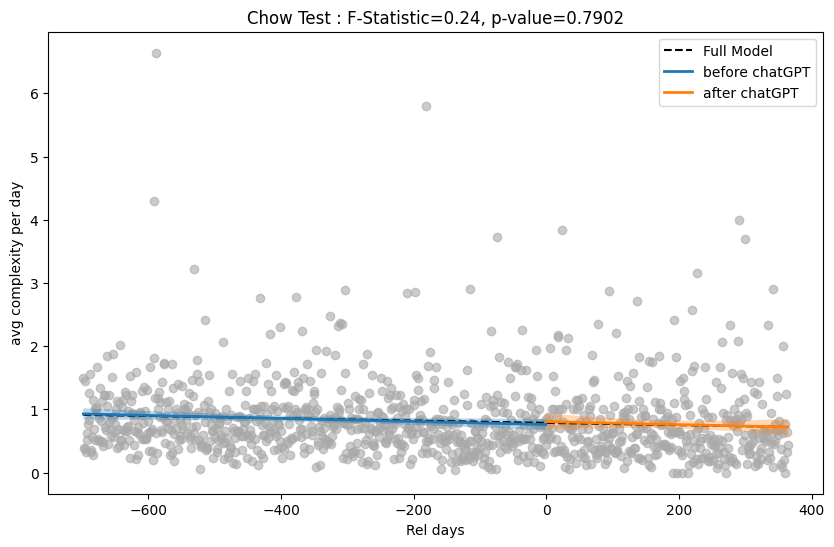

In [38]:
x = chow_df['rel_days'].values
y = chow_df['Cognitive Complexity'].values

split_idx = np.argmax(np.where(x <= 0))
x1= x[:split_idx]
x2= x[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y,  alpha=0.6, color='darkgray')
plt.plot(x, st_chow_2year.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x1, st_chow_2year.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x1, st_chow_2year.y1_predict - st_chow_2year.y1_conf_interval, st_chow_2year.y1_predict + st_chow_2year.y1_conf_interval, alpha=0.3)

plt.plot(x2, st_chow_2year.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x2, st_chow_2year.y2_predict - st_chow_2year.y2_conf_interval, st_chow_2year.y2_predict + st_chow_2year.y2_conf_interval, alpha=0.3)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_2:.2f}, p-value={p_value_2:.4f}")
plt.xlabel("Rel days")
plt.ylabel("avg complexity per day")
plt.show()


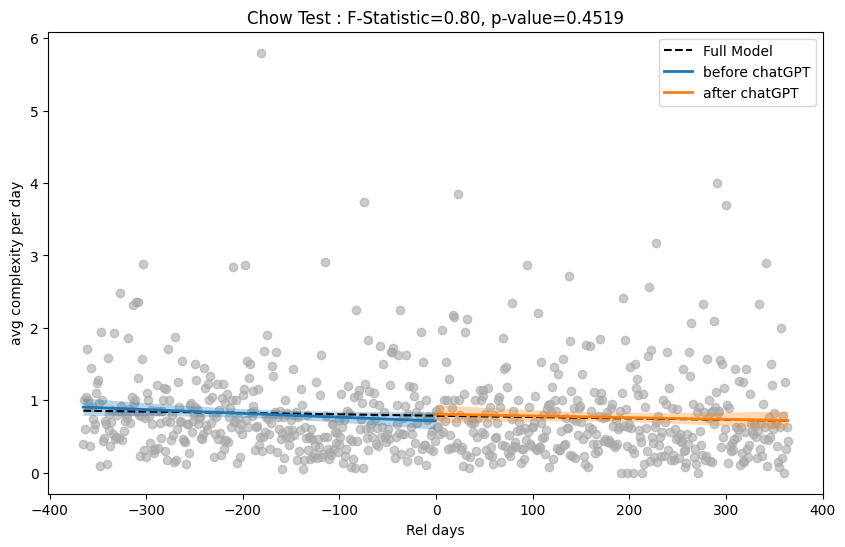

In [39]:
x = chow_df_1year['rel_days'].values
y = chow_df_1year['Cognitive Complexity'].values

split_idx = np.argmax(np.where(x <= 0))
x1= x[:split_idx]
x2= x[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y,  alpha=0.6, color='darkgray')
plt.plot(x, st_chow_1year.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x1, st_chow_1year.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x1, st_chow_1year.y1_predict - st_chow_1year.y1_conf_interval, st_chow_1year.y1_predict + st_chow_1year.y1_conf_interval, alpha=0.3)

plt.plot(x2, st_chow_1year.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x2, st_chow_1year.y2_predict - st_chow_1year.y2_conf_interval, st_chow_1year.y2_predict + st_chow_1year.y2_conf_interval, alpha=0.3)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_1:.2f}, p-value={p_value_1:.4f}")
plt.xlabel("Rel days")
plt.ylabel("avg complexity per day")
plt.show()
